In [2]:
# coding: utf-8
import sys, os
sys.path.append("../예제/")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

In [16]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

print(x_train)
print(t_train)

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    #optimizer = Adam(lr=0.001, beta1=0.9, beta2=0.999)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1 5 7 1 7 1 1 6 3 0 2 9
 3 1 1 0 4 9 2 0 0 2 0 2 7 1 8 6 4 1 6 3 4 5 9 1 3 3 8 5 4 7 7 4 2 8 5 8 6
 7 3 4 6 1 9 9 6 0 3 7 2 8 2 9 4 4 6 4 9 7 0 9 2 9 5 1 5 9 1 2 3 2 3 5 9 1
 7 6 2 8 2 2 5 0 7 4 9 7 8 3 2 1 1 8 3 6 1 0 3 1 0 0 1 7 2 7 3 0 4 6 5 2 6
 4 7 1 8 9 9 3 0 7 1 0 2 0 3 5 4 6 5 8 6 3 7 5 8 0 9 1 0 3 1 2 2 3 3 6 4 7
 5 0 6 2 7 9 8 5 9 2 1 1 4 4 5 6 4 1 2 5 3 9 3 9 0 5 9 6 5 7 4 1 3 4 0 4 8
 0 4 3 6 8 7 6 0 9 7 5 7 2 1 1 6 8 9 4 1 5 2 2 9 0 3 9 6 7 2 0 3 5 4 3 6 5
 8 9 5 4 7 4 2 7 3 4 8 9 1 9 2 8 7 9 1 8 7 4 1 3 1 1 0 2 3 9 4 9 2 1 6 8 4
 7 7 4 4 9 2 5 7 2 4 4 2 1 9 7 2 8 7 6 9 2 2 3 8 1 6 5 1 1 0 2 6 4 5 8 3 1
 5 1 9 2 7 4 4 4 8 

============== 1/16 ==============
epoch:0 | 0.11 - 0.102
epoch:1 | 0.136 - 0.12
epoch:2 | 0.161 - 0.129
epoch:3 | 0.225 - 0.116
epoch:4 | 0.297 - 0.13
epoch:5 | 0.346 - 0.146
epoch:6 | 0.396 - 0.16
epoch:7 | 0.449 - 0.167
epoch:8 | 0.483 - 0.177
epoch:9 | 0.523 - 0.183
epoch:10 | 0.564 - 0.192
epoch:11 | 0.593 - 0.204
epoch:12 | 0.616 - 0.218
epoch:13 | 0.647 - 0.23
epoch:14 | 0.67 - 0.238
epoch:15 | 0.68 - 0.238
epoch:16 | 0.701 - 0.257
epoch:17 | 0.735 - 0.272


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.744 - 0.286
epoch:19 | 0.742 - 0.282
============== 2/16 ==============
epoch:0 | 0.097 - 0.054
epoch:1 | 0.179 - 0.087
epoch:2 | 0.206 - 0.101
epoch:3 | 0.302 - 0.105
epoch:4 | 0.384 - 0.118
epoch:5 | 0.46 - 0.13
epoch:6 | 0.508 - 0.149
epoch:7 | 0.562 - 0.165
epoch:8 | 0.597 - 0.179
epoch:9 | 0.646 - 0.2
epoch:10 | 0.686 - 0.213
epoch:11 | 0.722 - 0.228
epoch:12 | 0.733 - 0.251
epoch:13 | 0.767 - 0.261
epoch:14 | 0.786 - 0.288
epoch:15 | 0.818 - 0.301
epoch:16 | 0.819 - 0.309
epoch:17 | 0.835 - 0.331
epoch:18 | 0.853 - 0.339


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.86 - 0.334
============== 3/16 ==============
epoch:0 | 0.071 - 0.103
epoch:1 | 0.137 - 0.133
epoch:2 | 0.265 - 0.201
epoch:3 | 0.388 - 0.25
epoch:4 | 0.48 - 0.281
epoch:5 | 0.56 - 0.332
epoch:6 | 0.647 - 0.366
epoch:7 | 0.702 - 0.406
epoch:8 | 0.736 - 0.442
epoch:9 | 0.767 - 0.472
epoch:10 | 0.816 - 0.503
epoch:11 | 0.852 - 0.538
epoch:12 | 0.875 - 0.562
epoch:13 | 0.905 - 0.581
epoch:14 | 0.921 - 0.616
epoch:15 | 0.944 - 0.635
epoch:16 | 0.957 - 0.652
epoch:17 | 0.964 - 0.676


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.975 - 0.689
epoch:19 | 0.98 - 0.714
============== 4/16 ==============
epoch:0 | 0.1 - 0.127
epoch:1 | 0.455 - 0.263
epoch:2 | 0.624 - 0.552
epoch:3 | 0.732 - 0.7
epoch:4 | 0.814 - 0.792
epoch:5 | 0.864 - 0.842
epoch:6 | 0.889 - 0.872
epoch:7 | 0.923 - 0.888
epoch:8 | 0.941 - 0.92
epoch:9 | 0.958 - 0.937
epoch:10 | 0.968 - 0.96
epoch:11 | 0.98 - 0.97
epoch:12 | 0.981 - 0.975
epoch:13 | 0.987 - 0.983
epoch:14 | 0.993 - 0.984
epoch:15 | 0.998 - 0.992
epoch:16 | 0.999 - 0.992
epoch:17 | 0.998 - 0.994
epoch:18 | 0.997 - 0.994


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.998 - 0.996
============== 5/16 ==============
epoch:0 | 0.111 - 0.109
epoch:1 | 0.107 - 0.44
epoch:2 | 0.129 - 0.778
epoch:3 | 0.145 - 0.866
epoch:4 | 0.274 - 0.905
epoch:5 | 0.316 - 0.932
epoch:6 | 0.414 - 0.959
epoch:7 | 0.552 - 0.976
epoch:8 | 0.655 - 0.976
epoch:9 | 0.736 - 0.987
epoch:10 | 0.804 - 0.99
epoch:11 | 0.839 - 0.994
epoch:12 | 0.876 - 0.997
epoch:13 | 0.888 - 0.995
epoch:14 | 0.907 - 0.998
epoch:15 | 0.897 - 0.999
epoch:16 | 0.917 - 1.0
epoch:17 | 0.931 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.941 - 1.0
epoch:19 | 0.949 - 1.0
============== 6/16 ==============
epoch:0 | 0.132 - 0.118
epoch:1 | 0.198 - 0.448
epoch:2 | 0.117 - 0.833
epoch:3 | 0.117 - 0.91
epoch:4 | 0.117 - 0.938
epoch:5 | 0.117 - 0.967
epoch:6 | 0.181 - 0.982
epoch:7 | 0.216 - 0.985
epoch:8 | 0.211 - 0.991
epoch:9 | 0.137 - 0.995
epoch:10 | 0.132 - 0.997
epoch:11 | 0.218 - 0.997
epoch:12 | 0.209 - 0.999
epoch:13 | 0.208 - 1.0
epoch:14 | 0.212 - 0.999
epoch:15 | 0.207 - 0.999
epoch:16 | 0.198 - 1.0
epoch:17 | 0.206 - 1.0
epoch:18 | 0.213 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.216 - 1.0
============== 7/16 ==============
epoch:0 | 0.116 - 0.102
epoch:1 | 0.116 - 0.723
epoch:2 | 0.116 - 0.887
epoch:3 | 0.116 - 0.948
epoch:4 | 0.116 - 0.979
epoch:5 | 0.116 - 0.986
epoch:6 | 0.116 - 0.99
epoch:7 | 0.116 - 0.995
epoch:8 | 0.116 - 0.996
epoch:9 | 0.116 - 0.998
epoch:10 | 0.116 - 1.0
epoch:11 | 0.116 - 1.0
epoch:12 | 0.116 - 1.0
epoch:13 | 0.116 - 1.0
epoch:14 | 0.116 - 1.0
epoch:15 | 0.116 - 1.0
epoch:16 | 0.116 - 1.0
epoch:17 | 0.116 - 1.0
epoch:18 | 0.116 - 1.0
epoch:19 | 0.116 - 1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 8/16 ==============
epoch:0 | 0.092 - 0.136
epoch:1 | 0.117 - 0.677
epoch:2 | 0.117 - 0.923
epoch:3 | 0.117 - 0.953
epoch:4 | 0.117 - 0.972
epoch:5 | 0.117 - 0.983
epoch:6 | 0.117 - 0.988
epoch:7 | 0.117 - 0.995
epoch:8 | 0.117 - 0.99
epoch:9 | 0.117 - 0.994
epoch:10 | 0.117 - 0.996
epoch:11 | 0.117 - 1.0
epoch:12 | 0.117 - 0.999
epoch:13 | 0.116 - 0.999
epoch:14 | 0.116 - 0.999
epoch:15 | 0.116 - 0.999
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 1.0
============== 9/16 ==============
epoch:0 | 0.116 - 0.147
epoch:1 | 0.116 - 0.819
epoch:2 | 0.1 - 0.943
epoch:3 | 0.117 - 0.96
epoch:4 | 0.117 - 0.97
epoch:5 | 0.105 - 0.977
epoch:6 | 0.105 - 0.986
epoch:7 | 0.117 - 0.994
epoch:8 | 0.117 - 0.99
epoch:9 | 0.117 - 0.995
epoch:10 | 0.117 - 0.988
epoch:11 | 0.117 - 0.994
epoch:12 | 0.116 - 0.996
epoch:13 | 0.116 - 0.998
epoch:14 | 0.116 - 0.997
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.998
epoch:17 | 0.116 - 0.994


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.116 - 0.996
epoch:19 | 0.116 - 0.983
============== 10/16 ==============
epoch:0 | 0.105 - 0.171
epoch:1 | 0.116 - 0.815
epoch:2 | 0.116 - 0.915
epoch:3 | 0.116 - 0.941
epoch:4 | 0.116 - 0.947
epoch:5 | 0.116 - 0.976
epoch:6 | 0.116 - 0.982
epoch:7 | 0.116 - 0.984
epoch:8 | 0.116 - 0.981
epoch:9 | 0.116 - 0.988
epoch:10 | 0.116 - 0.993
epoch:11 | 0.116 - 0.994
epoch:12 | 0.116 - 0.996
epoch:13 | 0.117 - 0.997
epoch:14 | 0.116 - 0.994
epoch:15 | 0.116 - 0.997
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.117 - 0.999
epoch:19 | 0.117 - 0.998


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 11/16 ==============
epoch:0 | 0.117 - 0.099
epoch:1 | 0.116 - 0.735
epoch:2 | 0.116 - 0.795
epoch:3 | 0.116 - 0.857
epoch:4 | 0.116 - 0.844
epoch:5 | 0.116 - 0.882
epoch:6 | 0.117 - 0.879
epoch:7 | 0.117 - 0.898
epoch:8 | 0.117 - 0.9
epoch:9 | 0.117 - 0.941
epoch:10 | 0.117 - 0.94
epoch:11 | 0.117 - 0.966
epoch:12 | 0.117 - 0.983
epoch:13 | 0.116 - 0.99
epoch:14 | 0.116 - 0.991
epoch:15 | 0.116 - 0.983
epoch:16 | 0.116 - 0.989
epoch:17 | 0.116 - 0.987
epoch:18 | 0.117 - 0.992


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.991
============== 12/16 ==============
epoch:0 | 0.099 - 0.099
epoch:1 | 0.1 - 0.741
epoch:2 | 0.116 - 0.837
epoch:3 | 0.116 - 0.85
epoch:4 | 0.117 - 0.943
epoch:5 | 0.117 - 0.921
epoch:6 | 0.116 - 0.938
epoch:7 | 0.116 - 0.979
epoch:8 | 0.116 - 0.986
epoch:9 | 0.116 - 0.97
epoch:10 | 0.116 - 0.993
epoch:11 | 0.116 - 0.993
epoch:12 | 0.116 - 0.994
epoch:13 | 0.116 - 0.996
epoch:14 | 0.116 - 0.992
epoch:15 | 0.116 - 0.996
epoch:16 | 0.116 - 0.995
epoch:17 | 0.116 - 0.992
epoch:18 | 0.116 - 0.999
epoch:19 | 0.116 - 0.999


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


============== 13/16 ==============
epoch:0 | 0.097 - 0.105
epoch:1 | 0.099 - 0.66
epoch:2 | 0.117 - 0.682
epoch:3 | 0.117 - 0.747
epoch:4 | 0.117 - 0.848
epoch:5 | 0.117 - 0.855
epoch:6 | 0.117 - 0.91
epoch:7 | 0.117 - 0.966
epoch:8 | 0.117 - 0.956
epoch:9 | 0.117 - 0.977
epoch:10 | 0.117 - 0.983
epoch:11 | 0.117 - 0.986
epoch:12 | 0.116 - 0.99
epoch:13 | 0.117 - 0.981
epoch:14 | 0.117 - 0.987
epoch:15 | 0.117 - 0.989
epoch:16 | 0.117 - 0.99
epoch:17 | 0.117 - 0.993
epoch:18 | 0.117 - 0.986


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.117 - 0.998
============== 14/16 ==============
epoch:0 | 0.097 - 0.157
epoch:1 | 0.117 - 0.301
epoch:2 | 0.117 - 0.71
epoch:3 | 0.116 - 0.775
epoch:4 | 0.116 - 0.773
epoch:5 | 0.116 - 0.78
epoch:6 | 0.116 - 0.789
epoch:7 | 0.116 - 0.804
epoch:8 | 0.116 - 0.879
epoch:9 | 0.116 - 0.87
epoch:10 | 0.116 - 0.884
epoch:11 | 0.116 - 0.881
epoch:12 | 0.116 - 0.893
epoch:13 | 0.116 - 0.891
epoch:14 | 0.116 - 0.885
epoch:15 | 0.116 - 0.895
epoch:16 | 0.116 - 0.895
epoch:17 | 0.116 - 0.874
epoch:18 | 0.116 - 0.895


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:19 | 0.116 - 0.899
============== 15/16 ==============
epoch:0 | 0.117 - 0.128
epoch:1 | 0.117 - 0.48
epoch:2 | 0.117 - 0.555
epoch:3 | 0.117 - 0.56
epoch:4 | 0.116 - 0.731
epoch:5 | 0.116 - 0.77
epoch:6 | 0.116 - 0.778
epoch:7 | 0.116 - 0.863
epoch:8 | 0.116 - 0.89
epoch:9 | 0.094 - 0.886
epoch:10 | 0.094 - 0.877
epoch:11 | 0.094 - 0.854
epoch:12 | 0.105 - 0.884
epoch:13 | 0.094 - 0.979
epoch:14 | 0.094 - 0.991
epoch:15 | 0.094 - 0.988
epoch:16 | 0.094 - 0.982
epoch:17 | 0.117 - 0.993


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


epoch:18 | 0.094 - 0.994
epoch:19 | 0.094 - 0.993
============== 16/16 ==============
epoch:0 | 0.116 - 0.135
epoch:1 | 0.116 - 0.4
epoch:2 | 0.117 - 0.556
epoch:3 | 0.117 - 0.591
epoch:4 | 0.117 - 0.664
epoch:5 | 0.117 - 0.74
epoch:6 | 0.105 - 0.794
epoch:7 | 0.105 - 0.856
epoch:8 | 0.105 - 0.876
epoch:9 | 0.105 - 0.873
epoch:10 | 0.105 - 0.882
epoch:11 | 0.105 - 0.89
epoch:12 | 0.105 - 0.884
epoch:13 | 0.105 - 0.899
epoch:14 | 0.105 - 0.897
epoch:15 | 0.105 - 0.897
epoch:16 | 0.117 - 0.888
epoch:17 | 0.117 - 0.895
epoch:18 | 0.117 - 0.898
epoch:19 | 0.117 - 0.9


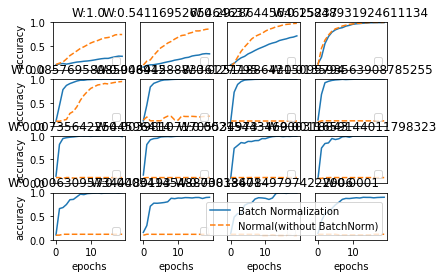

In [17]:
# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()